In [5]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\archive\AviationData.csv", encoding='latin1')
#df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\archive\USState_Codes.csv")


C:\Users\HP\AppData\Local\Temp\ipykernel_4972\4268395513.py:5: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\archive\AviationData.csv", encoding='latin1')


In [11]:
print(df.columns)


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [17]:
#Clean load with specific dtypes
df = pd.read_csv(
    r"C:\Users\HP\OneDrive\Desktop\archive\AviationData.csv",
    encoding='latin1',
    dtype={
        'Latitude': str,
        'Longitude': str,
        'Broad.phase.of.flight': str
    },
    low_memory=False
)
print(df.dtypes[['Latitude', 'Longitude', 'Broad.phase.of.flight']])


Latitude                 object
Longitude                object
Broad.phase.of.flight    object
dtype: object


In [54]:
df[df['Event.Date'].isna() | df['Publication.Date'].isna()][['Event.Date', 'Publication.Date']]


,Event.Date,Publication.Date
0,1948-10-24,NaT
2950,1982-10-03,NaT
3600,1983-01-01,NaT
3601,1983-01-01,NaT
3602,1983-01-01,NaT
...,...,...
88863,2022-12-11,NaT
88874,2022-12-15,NaT
88879,2022-12-18,NaT
88885,2022-12-26,NaT


In [56]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
print(df[['Latitude', 'Longitude']].head())


    Latitude  Longitude
0        NaN        NaN
1        NaN        NaN
2  36.922223 -81.878056
3        NaN        NaN
4        NaN        NaN


In [58]:
# Show rows with missing coordinates
print(df[df['Latitude'].isna() | df['Longitude'].isna()][['Latitude', 'Longitude']])


       Latitude  Longitude
0           NaN        NaN
1           NaN        NaN
3           NaN        NaN
4           NaN        NaN
6           NaN        NaN
...         ...        ...
88884       NaN        NaN
88885       NaN        NaN
88886       NaN        NaN
88887       NaN        NaN
88888       NaN        NaN

[76921 rows x 2 columns]


In [60]:
print(df[['Latitude', 'Longitude']].isna().sum())


Latitude     76903
Longitude    76915
dtype: int64


In [68]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
print(df[['Latitude', 'Longitude']].isna().sum())


Latitude     0
Longitude    0
dtype: int64


In [70]:
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')
for col in df.columns:
    print(col)


event_id
investigation_type
accident_number
event_date
location
country
latitude
longitude
airport_code
airport_name
injury_severity
aircraft_damage
aircraft_category
registration_number
make
model
amateur_built
number_of_engines
engine_type
far_description
schedule
purpose_of_flight
air_carrier
total_fatal_injuries
total_serious_injuries
total_minor_injuries
total_uninjured
weather_condition
broad_phase_of_flight
report_status
publication_date
year


In [72]:
#analyze trends
df['year'] = df['event_date'].dt.year
accidents_by_year = df.groupby('year').size()
print(accidents_by_year)


year
1974       1
1979       1
1982       1
1983       2
1988       1
1989       1
1990       1
1992       1
1995       1
1997       1
1998       3
1999       9
2000     147
2001     864
2002    1682
2003    1975
2004    1799
2005    1884
2006    1709
2007    1876
2020       2
2021       4
2022       3
dtype: int64


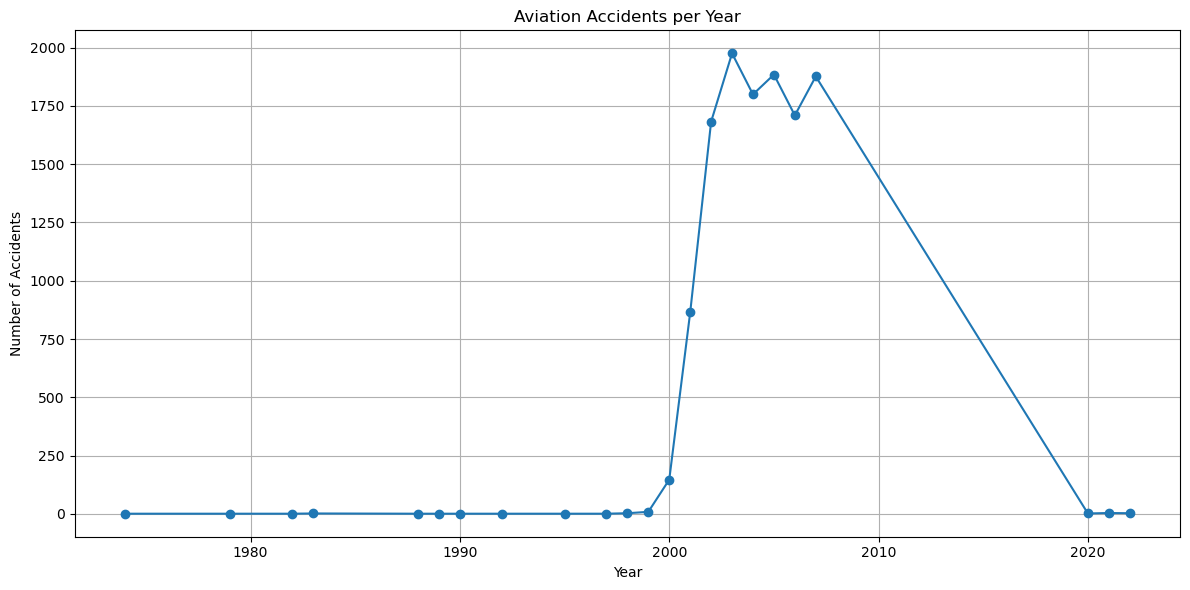

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
accidents_by_year.plot(kind='line', marker='o')
plt.title('Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()



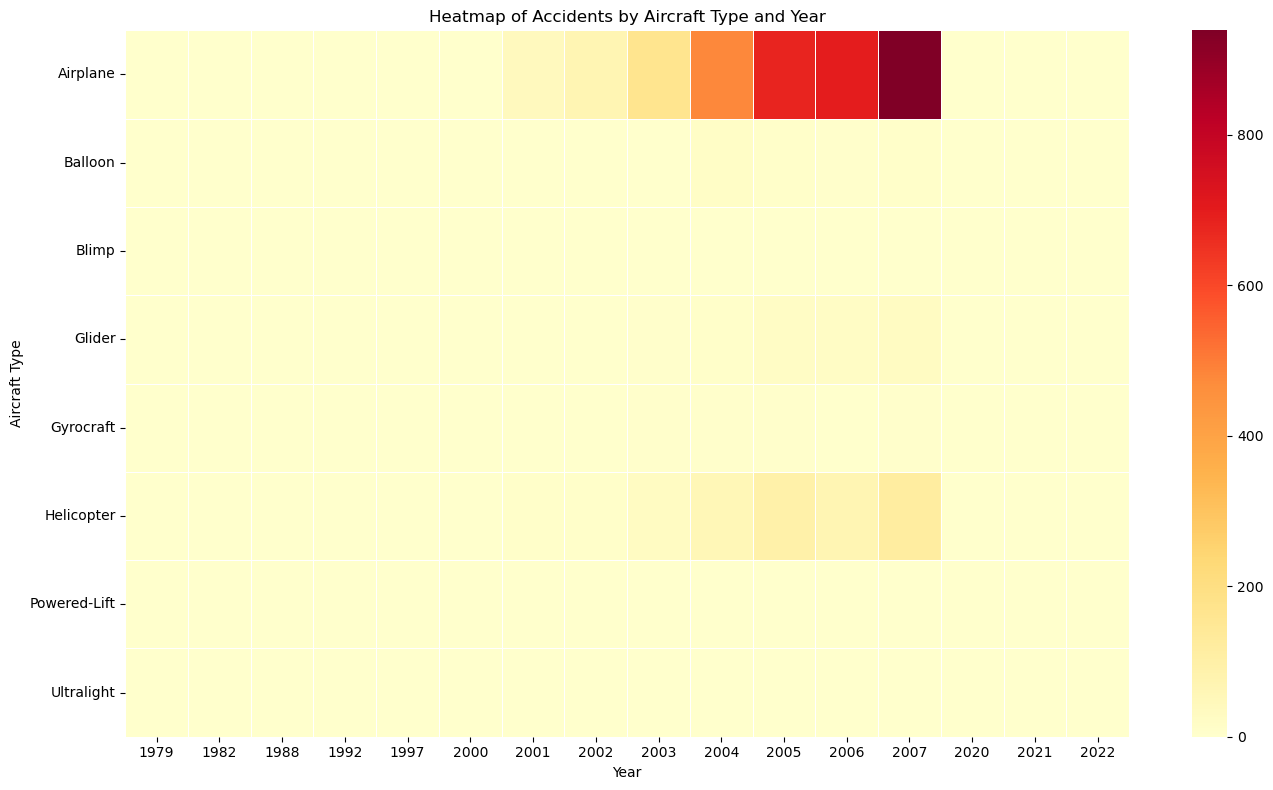

In [84]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(accidents_by_year_type.T, cmap="YlOrRd", linewidths=.5)
plt.title('Heatmap of Accidents by Aircraft Type and Year')
plt.xlabel('Year')
plt.ylabel('Aircraft Type')
plt.tight_layout()
plt.show()



In [86]:
#accidents by country
accidents_by_country = df['country'].value_counts().head(10)
print(accidents_by_country)


country
United States    11472
Australia           44
Canada              37
Venezuela           29
Bahamas             27
Germany             24
Colombia            24
France              20
Mexico              18
Argentina           13
Name: count, dtype: int64


In [94]:
#fatal accidents
fatal_accidents = df[df['total_fatal_injuries'].fillna(0).astype(float) > 0]
fatal_accidents



,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,3.692222e+01,-8.187806e+01,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,1974
593,20080417X00504,Accident,MIA08CA076,1982-03-16,"MOBILE, AL",United States,3.075778e+01,-8.835555e+01,MOB,MOBILE REGIONAL,...,NaN,1.0,NaN,NaN,NaN,IMC,Landing,Probable Cause,2008-04-30,1982
3654,20051208X01953,Accident,SEA83LA209,1983-01-08,"Goldendale, WA",United States,4.604111e+01,-1.208497e+02,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,VMC,Cruise,Probable Cause,2006-03-28,1983
6202,20020904X01525,Accident,SEA83FA208,1983-09-09,"Kalispell, MT",United States,4.812000e+01,-1.138875e+02,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2003-07-23,1983
24567,20021022X05356,Accident,CHI90LA280,1989-12-01,"ENGADINE, MI",United States,4.615444e+01,-8.566361e+01,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,IMC,Unknown,Probable Cause,2003-05-30,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63909,20080114X00045,Accident,LAX08FA043,2007-12-30,"PASO ROBLES, CA",United States,3.554222e+01,-1.205228e+02,PRB,Paso Robles Airport,...,NaN,1.0,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,2014-06-20,2007
85609,20201201102354,Accident,GAA21WA005,2020-11-14,"Sao Pedro, SP, Brazil",Brazil,2.237400e+06,4.750030e+07,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,2020
85726,20210106102499,Accident,GAA21WA006,2020-12-29,"Rancador, PR, Brazil",Brazil,2.439350e+06,5.217220e+07,NaN,NaN,...,Rogerio Franci Brito e Outros,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,2020
85750,20210121102539,Accident,GAA21WA009,2021-01-06,"Vila Velha, ES, Brazil",Brazil,2.025230e+06,4.019570e+07,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,2021


In [106]:

fatal_accidents = df[df['total_fatal_injuries'].fillna(0).astype(float) > 0].copy()
fatal_accidents['total_fatal_injuries'] = fatal_accidents['total_fatal_injuries'].astype(float)
fatal_accidents['total_fatal_injuries'].describe()

count    2621.000000
mean        2.153758
std         5.314284
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       141.000000
Name: total_fatal_injuries, dtype: float64

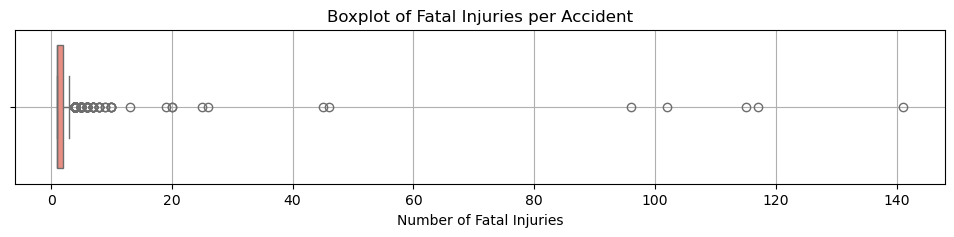

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the column is numeric
fatal_accidents['total_fatal_injuries'] = fatal_accidents['total_fatal_injuries'].astype(float)

# Create boxplot
plt.figure(figsize=(12, 2))
sns.boxplot(x=fatal_accidents['total_fatal_injuries'], color='salmon')
plt.title('Boxplot of Fatal Injuries per Accident')
plt.xlabel('Number of Fatal Injuries')
plt.grid(True)
plt.show()




<Axes: title={'center': 'Fatal Accidents per Year'}, xlabel='year', ylabel='Number of Accidents'>

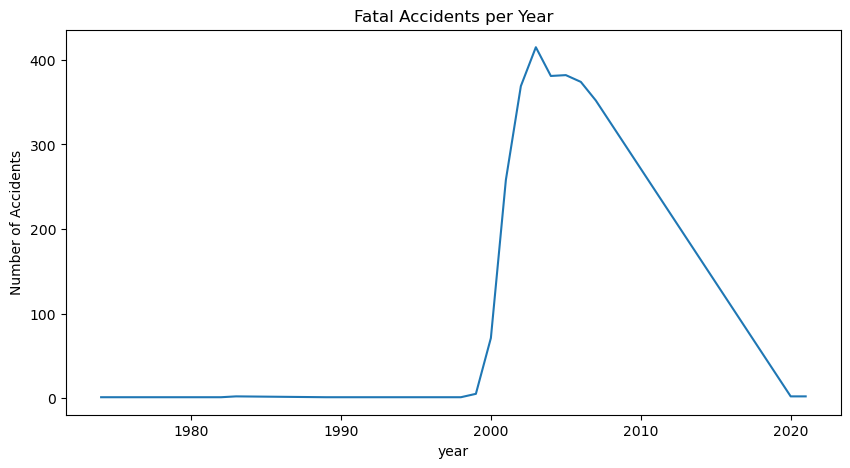

In [114]:
fatal_accidents = df[df['total_fatal_injuries'].fillna(0).astype(float) > 0].copy()

fatal_accidents['event_date'] = pd.to_datetime(fatal_accidents['event_date'])
fatal_accidents['year'] = fatal_accidents['event_date'].dt.year

yearly_fatal_trend = fatal_accidents.groupby('year').size()

yearly_fatal_trend.plot(kind='line', figsize=(10, 5), title='Fatal Accidents per Year', ylabel='Number of Accidents')


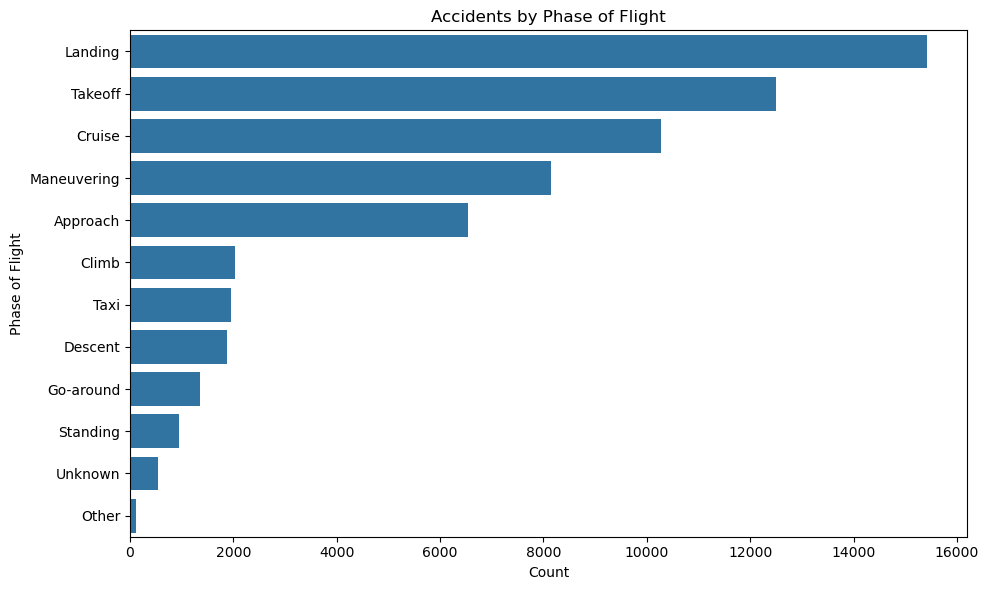

In [46]:
#plot top accident phases
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='broad_phase_of_flight', order=df['broad_phase_of_flight'].value_counts().index)
plt.title('Accidents by Phase of Flight')
plt.xlabel('Count')
plt.ylabel('Phase of Flight')
plt.tight_layout()
plt.show()


In [118]:
df.to_csv("cleaned_aviation_data.csv", index=False)
